In [89]:
import numpy as np
import pandas as pd

In [90]:
import seaborn as sns #数据可视化库
iris = sns.load_dataset('iris')
iris.head() # 只看前几行，看下数据结构

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
iris.shape # 本是150行，5列的数据库

(150, 5)

In [34]:
X_iris = iris.drop('species', axis=1) # drop掉名为'species'的一列，变为150行，4列的数据库
X_iris.shape

(150, 4)

In [35]:
y_iris = iris['species'] # 单取出'species'列，这一列有150行
y_iris.shape

(150,)

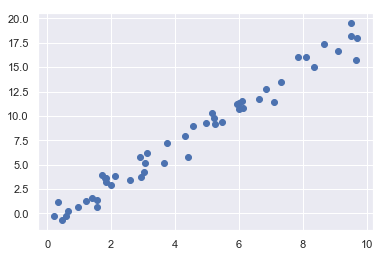

In [36]:
# Supervised learning example: Simple linear regression
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50) # 两次rng.rand(50)是不一样的,50个x 50个y

#注意与y轴焦点是大约是-1，因为上述函数可写作：y=2.1x-1
plt.scatter(x, y);

In [37]:
# 1. Choose a class of model

# sklearn -- sci-kit learn 机器学习
# linear regression 线性回归
from sklearn.linear_model import LinearRegression

In [38]:
# 2. Choose model hyperparameters

# linear regression 线性回归
# LinearRegression(fit_intercept=True,normalize=False,copy_X=True,n_jobs=1)
# fit_intercept:是否有截据，如果没有则直线过原点
# normalize:是否将数据归一化
# copy_X:默认为True，当为True时，X会被copied,否则X将会被覆写
# n_jobs:默认值为1。计算时使用的核数

model = LinearRegression(fit_intercept=True)
model #选择了线性回归模型

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
x.shape

(50,)

In [40]:
# 3. Arrange data into a features matrix and target vector
X = x[:, np.newaxis] 
X.shape

(50, 1)

In [41]:
y.shape

(50,)

In [42]:
# 4. Fit the model to your data
model.fit(X, y) # 把数据套进模型 [num_of_samples, num_of_features]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
# 斜率 coefficient（接近2.1）
model.coef_

array([1.9776566])

In [44]:
# 截距 interception(接近-1)
model.intercept_

-0.9033107255311164

In [45]:
# 5. Predict labels for unknown data
xfit = np.linspace(-1, 11) # 等差数列，只有两个参数的时候默认分割100点

In [46]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

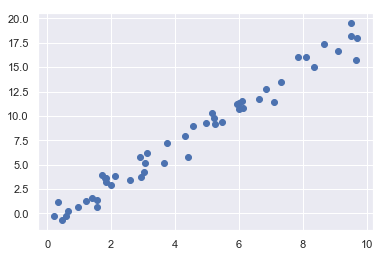

In [47]:
plt.scatter(x, y);

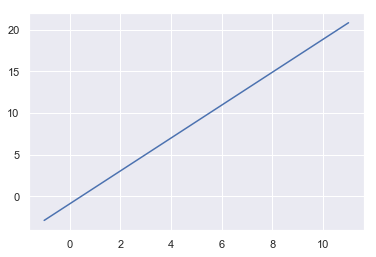

In [48]:
plt.plot(xfit, yfit); # 用线性回归模型得到的预测

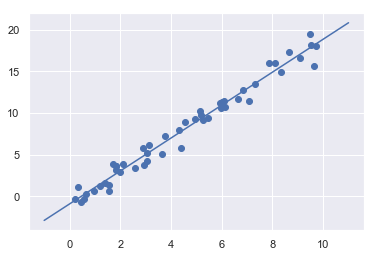

In [49]:
plt.scatter(x, y)
plt.plot(xfit, yfit);  # 画在一起

In [50]:
# Supervised learning example: Iris classification

# sklearn.model_selection.train_test_split随机划分训练集和测试集
# train_test_split是交叉验证中常用的函数，功能是从样本中随机的按比例选取train data和testdata
# X_train,X_test, y_train, y_test = train_test_split(train_data,train_target,test_size=0.4, random_state=0)
# train_data：所要划分的样本特征集
# train_target：所要划分的样本结果
# test_size：样本占比，如果是整数的话就是样本的数量
# random_state：是随机数的种子

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [51]:
# GaussianNB：先验为高斯分布的朴素贝叶斯

from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [52]:
# 准确度测试
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [53]:
# Unsupervised learning example: Iris dimensionality （ y is not specified!）

data_iris = X_iris # X_iris drop掉了species这一列，剩下的数据就都是float格式了。

from sklearn.decomposition import PCA  # 1. Choose the model class PCA--Principal Component Analysis主成分分析
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(data_iris)                   # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(data_iris)      # 4. Transform the data to two dimensions

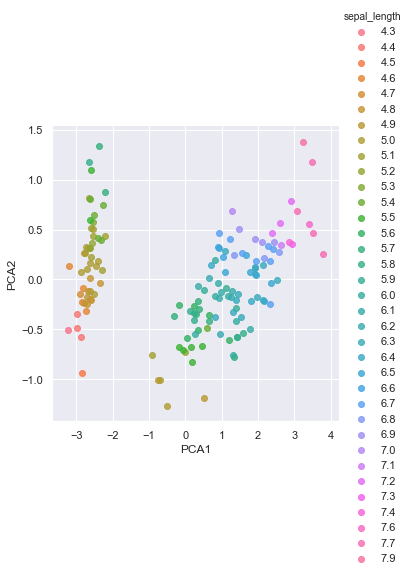

In [54]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='sepal_length', data=iris, fit_reg=False);
# lmplot是seaborn下的一个回归模型

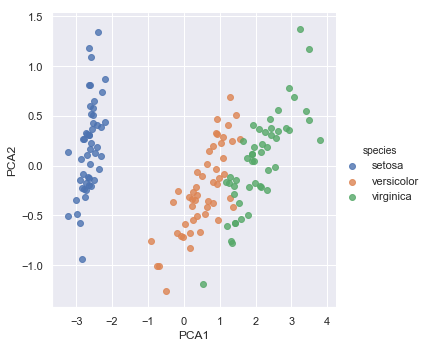

In [55]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

In [56]:
# Unsupervised learning: Iris clustering（clustering 是 unsupervised learning）

from sklearn.mixture import GaussianMixture     # 1. Choose the model class 高斯混合模型 gmm
model = GaussianMixture(n_components=3,
            covariance_type='full')             # 2. Instantiate the model with hyperparameters
model.fit(data_iris)                            # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(data_iris)                # 4. Determine cluster labels

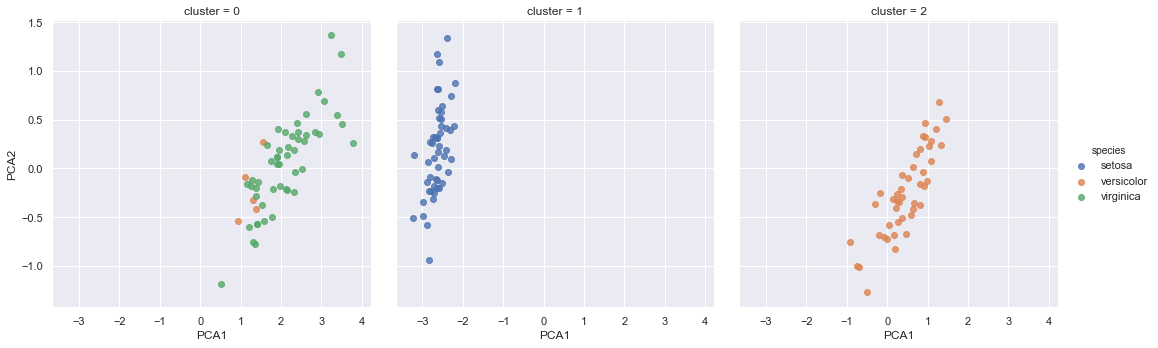

In [58]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',col='cluster', fit_reg=False);

In [59]:
# Example: Exploring Hand-written Digits

In [60]:
# 1. Loading and visualizing the digits data
from sklearn.datasets import load_digits 
digits = load_digits()
digits.images.shape

(1797, 8, 8)

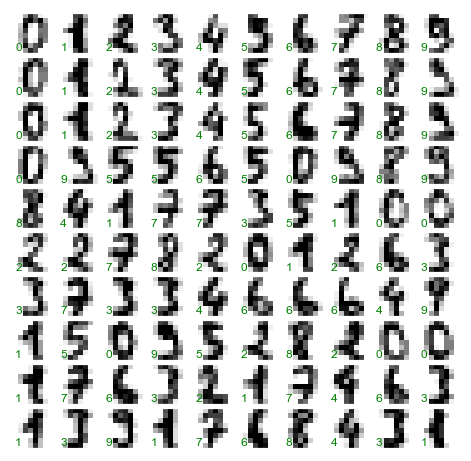

In [77]:
# visualize the first hundred of these:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [78]:
# two-dimentional [n_samples, n_features] 
X = digits.data
X.shape

(1797, 64)

In [79]:
# target array
y = digits.target
y.shape

(1797,)

In [80]:
# 2. Unsupervised learning: Dimensionality reduction

In [81]:
# reduce the dimensions to 2, using an unsupervised method.
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

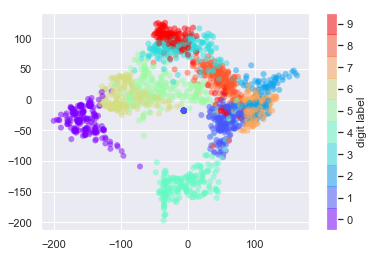

In [82]:
# visualized
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [83]:
# 3. Classification on digits

In [84]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
# X_train,X_test, y_train, y_test = train_test_split(train_data,train_target,test_size=0.4, random_state=0)

In [85]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [87]:
# compareing the true values of the test set to the predictions
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

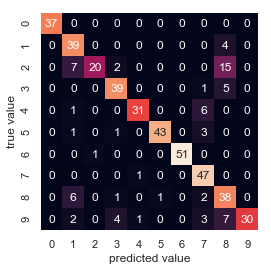

In [88]:
# 
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

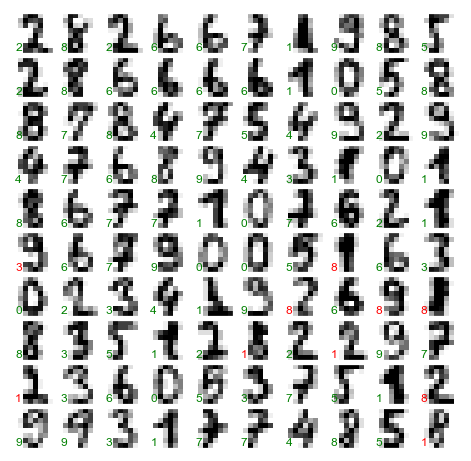

In [71]:
#
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')